<a href="https://colab.research.google.com/github/ivanleech/Pytorch-EfficientNet/blob/main/Birds_Classifier_Pytorch_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐦 Bird Species Classification with EfficientNet (PyTorch) 🚀

## Overview
Explore bird species classification using a Kaggle dataset containing 525 charming bird species images. The data has been imported from Kaggle's sources into this notebook environment.

## Dataset
A diverse collection of bird images serves as the basis for developing an accurate species classification model. 🌈 The images are resized to 128 x 128 pixels.

## Notebook Contents
1. **Dataset:** Loads and resizes images from directories. 📷
2. **DataLoader:** Converts the dataset into batches of 32 for efficient training. 🔄
3. **Load PyTorch Base Model:** Pulls EfficientNet from the 'timm' library, applies transfer learning by connecting to 525 classes after removing the last layer. 🧠
4. **Training:** Runs training with specified parameters (num_epochs, cross-entropy loss function, and Adam optimizer). 🚂
5. **Evaluation:** Assesses model performance on a validation set, monitoring loss over training and validation. 📊

## Acknowledgments
- Kaggle for providing the dataset and a conducive environment for data science and machine learning projects. 🙌
- Rob Mulla for the insightful PyTorch tutorial. 👏




In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '100-bird-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F534640%2F5468571%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T014404Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f2061da0afe0086ff0ec67bfb56cb4903bc20429696528c1d8c404c8eedd83819609d97209266cf055cca2d713c60202b1216e448e9b8b208ddd07755226d9bcec73c5d8e9b1ad4333f2df72c8c5ffafc62d04ea52e64f431c3dbf80a173e67a1f9607e82b61b0bfb0a04815fa2f4f85f26ddddf3fb208e3bba721258c0fa67dd2770ebe8bd6ec28df970c8afe4829e7d9439b7b0da122f118cd0ef79c57795a83716adf270fd343508fd515cd73116fc852bd2710309c1aa5059c52d443fdf9e205f22dfc51a0b962048acd278750871de139f4491a40ee1ea174f1bb7d954b5a33ccada999ca02841b7f909aaaea4a03b866d0d67bf200e11943a5bc87acf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2099628449 bytes downloaded
Downloaded and uncompressed: 100-bird-species
Data source import complete.


In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# System Version: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
# PyTorch version 2.1.2+cpu
# Torchvision version 0.16.2+cpu
# Numpy version 1.26.3
# Pandas version 2.2.0

In [4]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.1 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version 2.1.0+cu121
Torchvision version 0.16.0+cu121
Numpy version 1.25.2
Pandas version 1.5.3


# Dataset
* Load dataset from source
* resize all images to 128x128

In [6]:
class BirdsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [7]:
dataset = BirdsDataset(
    data_dir='/kaggle/input/100-bird-species/train'
)

dataset length: 84635
5


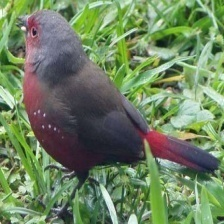

In [8]:
print(f'dataset length: {len(dataset)}')

image, label = dataset[888]
print(label)
image

In [9]:
data_dir = '/kaggle/input/100-bird-species/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'AFRICAN EMERALD CUCKOO', 5: 'AFRICAN FIREFINCH', 6: 'AFRICAN OYSTER CATCHER', 7: 'AFRICAN PIED HORNBILL', 8: 'AFRICAN PYGMY GOOSE', 9: 'ALBATROSS', 10: 'ALBERTS TOWHEE', 11: 'ALEXANDRINE PARAKEET', 12: 'ALPINE CHOUGH', 13: 'ALTAMIRA YELLOWTHROAT', 14: 'AMERICAN AVOCET', 15: 'AMERICAN BITTERN', 16: 'AMERICAN COOT', 17: 'AMERICAN DIPPER', 18: 'AMERICAN FLAMINGO', 19: 'AMERICAN GOLDFINCH', 20: 'AMERICAN KESTREL', 21: 'AMERICAN PIPIT', 22: 'AMERICAN REDSTART', 23: 'AMERICAN ROBIN', 24: 'AMERICAN WIGEON', 25: 'AMETHYST WOODSTAR', 26: 'ANDEAN GOOSE', 27: 'ANDEAN LAPWING', 28: 'ANDEAN SISKIN', 29: 'ANHINGA', 30: 'ANIANIAU', 31: 'ANNAS HUMMINGBIRD', 32: 'ANTBIRD', 33: 'ANTILLEAN EUPHONIA', 34: 'APAPANE', 35: 'APOSTLEBIRD', 36: 'ARARIPE MANAKIN', 37: 'ASHY STORM PETREL', 38: 'ASHY THRUSHBIRD', 39: 'ASIAN CRESTED IBIS', 40: 'ASIAN DOLLARD BIRD', 41: 'ASIAN GREEN BEE EATER', 42: 'ASIAN OPEN

In [10]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = '/kaggle/input/100-bird-species/train'
dataset = BirdsDataset(data_dir, transform)

In [11]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

# Dataloaders
* Batch dataset for faster training
* Shuffle = True -> Ensures labels are different and distributed across batches


In [12]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [13]:
for images, labels in dataloader:
    break
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [14]:
labels

tensor([ 69, 319, 452, 117, 221, 190, 472, 472, 500,  86, 198, 518, 417, 140,
        418, 139, 299, 486, 167, 293, 224, 143, 437, 152, 178, 379,  48, 468,
        184, 434,  77, 317])

# Pytorch Model
* Load base model using timm (EfficientNet)
* Apply transfer learning - Remove last layer from base model and connect them to the number of birds classes

In [15]:
class SimpleBirdClassifer(nn.Module):
    def __init__(self, num_classes=525):
        super(SimpleBirdClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output


In [16]:
model = SimpleBirdClassifer(num_classes=525)
print(str(model)[:500])

SimpleBirdClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [17]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 525])

# Training


*   Specify Epoch
*   Optimizer: Adam
*   Loss Function: Cross Entropy



In [18]:
criterion = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer

In [19]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 525]) torch.Size([32])


In [20]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '../input/100-bird-species/train/'
valid_folder = '../input/100-bird-species/valid/'
test_folder = '../input/100-bird-species/test/'

train_dataset = BirdsDataset(train_folder, transform=transform)
val_dataset = BirdsDataset(valid_folder, transform=transform)
test_dataset = BirdsDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [21]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleBirdClassifer(num_classes=525)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")


Training loop:   0%|          | 0/2645 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 5.132096575344137, Validation loss: 3.6994054663521903


Training loop:   0%|          | 0/2645 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 3.1586614788096212, Validation loss: 2.1477686709449406


Training loop:   0%|          | 0/2645 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 2.128585035800793, Validation loss: 1.5879307295481364


Training loop:   0%|          | 0/2645 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 1.5835675756514527, Validation loss: 1.3146455130804153


Training loop:   0%|          | 0/2645 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 1.219920615478888, Validation loss: 0.985907614844186


# Evaluation

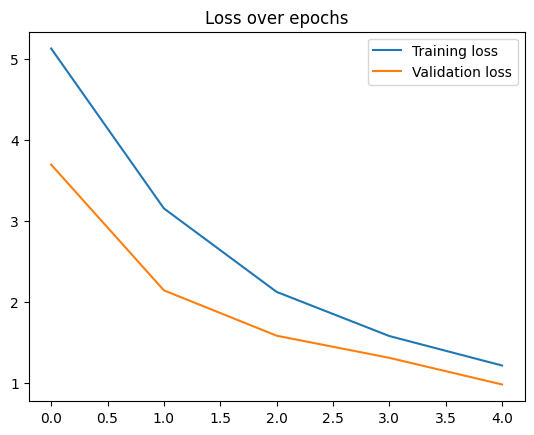

In [22]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

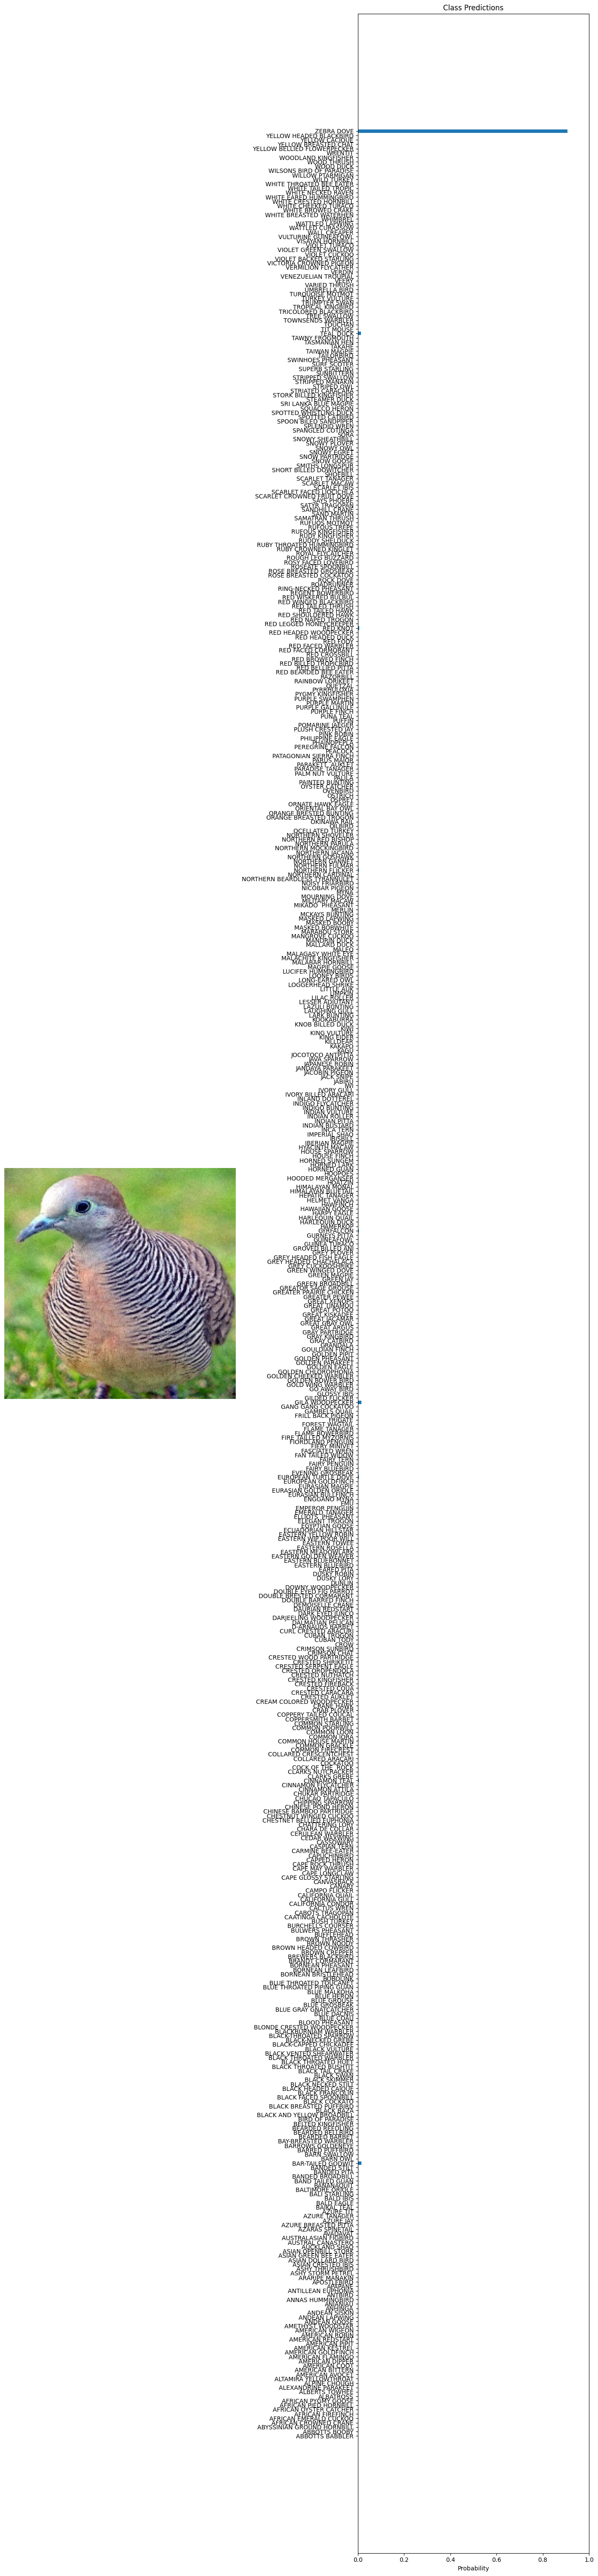

In [32]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 60))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = "/kaggle/input/100-bird-species/test/ZEBRA DOVE/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)